# Python for Data Analysis

The following three weeks we will use Jupyter Notebook environment. It is still the same Python and you could do the same job in Spyder or any other IDE. Jupyter Notebook is an extremely popular tool that allows to combine simple text, code and results of running this code, that is, numbers and graphs, in one document. 

Jupyter Notebook is very good for Python-related presentations and for sharing your code. You will find a lot of extremely good tutorials on Python shared as Jupyter Notebook documents. For example, tutorial on Python and Numpy -- https://cs231n.github.io/python-numpy-tutorial/, which is this week topic. You can run it online -- just click on the icon "Open in Colab" in the beginning of the tutorial.

You can read more about Jupyter Notebook here: https://realpython.com/jupyter-notebook-introduction/. "Rich content" mentioned in that manual, or just text formatting, they follow rules of **Markdown** -- it is a special programming language for text formatting and presentation. It is very easy and quick to learn: https://www.markdownguide.org/basic-syntax/.

This week we will talk about **Numpy**. Next week topic is **Pandas**. And week after that is **Seaborn** and data visualisation in general.

## Jupyter notebook magic commands

Jupyter Notebook (and Spyder too) uses not Python but iPython -- an enhanced version of Python that has some extra functionality that is not supported by "true" Python. This functionality is called *magic*. There are two types of *magic* supported by Jupyter Notebook: line magic and cell magic. Spyder supports only line magic as thee are no cells. Also, not all line magic command supported in Spyder or in a terminal window in more general sense.

These magics are designed to facilitate common tasks and enable easier control over the jupyter notebook system. A line magic command is prefixed by percent symbol %. A cell magic command is prefixed by double percent symbol -- %%.

A line magic command (%) takes as an argument the rest of the line. A cell magic command (%%) takes as an argument the rest of the line plus the all lines of code below (shift+enter signifying the end of the block), e.g.:

In [1]:
# line magic example
import random

# %timeit - check execution time for any Python statement
%timeit x = [random.random() for i in range(1000)]

94 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [2]:
%%timeit x = []
for i in range(1000):
    x.append(random.random())

# cell magic should always start from %% - no comments or even empty line is allowed

145 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In both cases the result is a execution time of one line statement or  the entire cell with multiple commands. You can see the full list of magic commands by typing `%lsmagic`. In fact, you can get the same list by typing just `lsmagic` -- without percent symbol, as (most probably) *automagic* is ON on your computer. However, I would advice to use percent symbol anyway to separate *magic* commands and normal Python commands -- this is a good programming style.

In [3]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [4]:
# another example of line magic
%run hello_world.py

Hello World!


You can run any `.py` script (file should be in the same folder as your Jupyter Notebook document). 

The script is run in an empty namespace (with no imports or other variables defined) so that the behavior should be identical to
running the program on the command line. All variables (imports, functions, and globals) defined in the file will
then be accessible in the jupyter notebook notebook shell. So, it is good to use for loading some "standard" suit of packages and functions you tend to use in your every project.

Can use `%run –i` to give a script access to variables already defined in the interactive Jupyter Notebook namespace.

# NumPy package

Designed to efficiently manipulate large multi‐dimensional arrays of arbitrary records with small sacrifices for speed.
It provides:

* `ndarray` -- a fast and space-efficient multidimensional array providing vectorised arithmetic operations.
* Standard mathematical functions for fast operations on entire arrays of data without having to write loops.
* Tools for reading / writing array data to disk and working with memory-mapped files.
* Basic Linear algebra, random number generation, Fourier transform capabilities, tools for integrating code written in C, C++, and Fortran.
* Does not provide very much high-level data analytical functionality. 

We don't use NumPy that much for data analysis as there are other packages for that. However, the package `NumPy` is a foundation for other packages to use its functionality for advanced analytics. For example, for machine learning and artificial intelligence: text analysis, computer vision, voice recognition -- all of them use "basic" algebra over NumPy arrays. So, understanding of how NumPy works is very important.

## NumPy array

NumPy array is an N-dimensional array object, or `ndarray`. It is fast, flexible container for large data sets in Python. Mathematical operations on whole blocks of data use similar syntax to the equivalent operations between scalar elements.

In [5]:
# import numpy package and create a nickname for it
import numpy as np

# create a numpy array
data = np.array([[5,-10,2], [4, 3, 9]])

# check the result
data

array([[  5, -10,   2],
       [  4,   3,   9]])

In [6]:
# check data type
type(data)

numpy.ndarray

In [7]:
# try mathematical operation over the numpy array
data * 10

array([[  50, -100,   20],
       [  40,   30,   90]])

All numbers in the array were multiplied by 10 at once -- no need for using loops. This is called **vectorisation** -- you process all values at the same time. It makes huge computational saving! 

In [8]:
# create a large sequence of random numbers
x = np.random.random(1000)

# take every element in power 2 using for-loop
%timeit res = [i**2 for i in x]

# take every element in power 2 using vectorisation
%timeit res = x**2

302 µs ± 1.74 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.3 µs ± 16.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


As you can see, vectorisation is more than 150 times quicker than the for-loop. From now on, your programming motto should be: **avoide loops -- if it is possible to use vectorisation, you should use vectorisation**.

## The most important rule of NumPy arrays

A numpy array is a generic multidimensional container for **homogeneous** data; that is, all elements must be of the same type. This is the only way to guarantee *vectorisation*. If you do multiplication for the array, you need to be confident that all elements of that array are numerical and of the same type -- integer or float or boolean.

In [9]:
# I try to create a numpy array from the list of floats and integers
myarr = np.array([1.1, 2.2, 3.3, 4, 5])

# check the result - all numbers are floats
myarr

array([1.1, 2.2, 3.3, 4. , 5. ])

In [10]:
# I try to create a numpy array from the list of strings and numbers
myarr = np.array(["a", "b", 3.3, 4, 5])

# check the result - all elements are strings
myarr

array(['a', 'b', '3.3', '4', '5'], dtype='<U32')

It is impossible to mix different data types in an array. Automatic conversion always go towards a way that guarantees not losing any information. 

If you convert float to integer, then you can lose an information after decimal point. But if you convert integer to float, you don't lose anything. So, the mixture of floats and integers was converted to floats.

It is impossible (in general) to convert a string in to a number, hence a mix of strings and numbers was converted to strings.

## Properties of numpy arrays

Every array has properties: shape, type, size, number of dimensions. See examples below:

In [11]:
# create a numpy array
data = np.array([[5,-10,2], [4, 3, 9]])

# check data type
data.dtype

dtype('int32')

In [12]:
# check size - total number of elements in the array
data.size

6

In [13]:
# check the number of dimensions
data.ndim

2

In [14]:
# check shape of the array
data.shape

(2, 3)

Array properties look like methods of the object `ndarray`. You will see them in the list when you run `dir(data)`. However, they are not functions, they don't do anything but report an information about the array. They are not functions but properties, so they don't use parenthesis at the end.

Try to run a function `dir()` for a numpy array and see a long list of methods and properties. Also, numpy itself is an object with advanced functionality -- try `dir(np)` and you get even longer list. It is impossible to memorise all of them and there is no need for that. So, I don't include this list here. You just need to be able to find the right functionality when you need it.

https://numpy.org/doc/stable/user/index.html - user guide for NumPy package.

## Creating NumPy array

There are many ways to create a numpy array. First is to use function `array()` from `numpy` package. It takes any sequence-like object and produces an array.

In [15]:
# from the list
np.array([1, 2, 3, 4])

array([1, 2, 3, 4])

In [16]:
# from the tuple
np.array((1, 2, 3, 4))

array([1, 2, 3, 4])

In [17]:
# from list of lists - each list should be of the same size
np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [18]:
# from range
np.array(range(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

There are many specialised functions that can create a numpy array

In [19]:
# array of size 10 full of zeros
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
# array with 3 rows and 6 columns - all full of zeros
np.zeros((3, 6))     # provide a tuple for required shape

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [21]:
# array with 3 rows and 6 columns - all full of ones
np.ones((3, 6))     # provide a tuple for required shape

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [22]:
# "empty" array of given size. values are very close to zero however they are not zero
# this type of array is quicker to create than np.zeros()
np.empty((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [23]:
# an array with a range of values - similar to function range()
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
# range starting at 10 and finishing one step before 30 with step 2
np.arange(10, 30, 2)

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [25]:
# create an array by copying its property
a = np.zeros((2,6))   # given array
np.ones_like(a)       # crete an array of the same size but full of ones

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

There are special types of arrays which might be useful for the matrix algebra -- identity matrix. That is, a square array with 1 on the diagonal and 0 everywhere else.

In [26]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [27]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

One more way to create an array is to use functions for random numbers generation and get an array full of random numbers from the desired distribution.

In [28]:
# array with standard normal distribution values
np.random.randn(2,5)  

array([[-0.58112472,  2.14358352,  0.52528555,  0.91477806,  0.05506357],
       [ 1.00970321,  1.00695007,  1.54848062,  0.43921664,  0.81631858]])

In [29]:
# integer numbers from 1 to 10 (inclusive)
np.random.randint(low = 1, high = 11, size = (2,10))

array([[ 4, 10, 10,  8,  7,  1,  1,  4,  7,  7],
       [ 2,  2,  3,  8,  4,  1,  3,  7,  6,  6]])

## Convert data types

When you create an array it gets its data type based on the nature of the data, and all values should be homogeneous. However, you can set your own data type during creating the array, or change it later. Setting or changing data type is called *typecasting*.

In [30]:
# create an array - it should be float but we change that
arr = np.array([1.1, 2.2, 3.3, 4, 5], dtype = int)
arr

array([1, 2, 3, 4, 5])

In [31]:
# change data type to float
arr.astype(float)

array([1., 2., 3., 4., 5.])

In [32]:
# change data type to string - there are many different types of string, this is Unicode
arr.astype(np.str_)

array(['1', '2', '3', '4', '5'], dtype='<U11')

## Indexing and Slicing of Arrays

Indexing and slicing of arrays is very similar to those in lists. If an array is one-dimensional, then you provide one index. If an array is two-dimensional, then you need tow indexes -- first for rows and second for columns. If an array of higher dimensionality, then you need more indexes.

As it is common in Python in general, indexing in NumPy starts from zero. The very first element have index zero, second element has index 1 and so on.

### Integer indexing

In [33]:
# one-dimesional array
arr = np.arange(10)
print(arr)
arr[5]    # get element with index 5 - sixth value from the array

[0 1 2 3 4 5 6 7 8 9]


5

In [34]:
# two-dimesional array
arr = np.arange(10).reshape((2,5))
print(arr)
arr[1,3]   # second row, fourth column

[[0 1 2 3 4]
 [5 6 7 8 9]]


8

Arrays are mutable. So, you can not just extract values but change them as well

In [35]:
# two-dimesional array
arr = np.arange(10).reshape((2,5))
print(arr)     # original array

arr[1,3] = 99  # change value
print(arr)     # updated array

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[ 0  1  2  3  4]
 [ 5  6  7 99  9]]


As you can see, multidimensional array looks like a list of lists. The number of square brackets give you an indication about the number of dimensions in the array. So, it is possible to use a single index for the multidimensional array.

In [36]:
print(arr) # check our array

[[ 0  1  2  3  4]
 [ 5  6  7 99  9]]


In [37]:
arr[1]     # get the second element, which is the second row

array([ 5,  6,  7, 99,  9])

In the example above, we take a two-dimensional array and use only one index (for a row) -- the result is a one-dimensional array. First index and single index -- are always for the row. If you want to extract a column, you still need to select some rows -- see slicing below.

When we use two indexes (for a row and for a column) -- the result is an actual value stored in the array.

In [38]:
arr[1][3]  # get the second element of array and then its fourth element

99

In [39]:
# indexing works the same for higher dimensionality
arr = np.arange(12).reshape((2,2,3))   # get three-dimensional array
arr

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [40]:
arr[1, 1, 2]   # comma-separated indexes

11

In [41]:
arr[1][1][2]   # single indexes

11

For the indexing above we provide an index for a row and then an index for a column. There should be two integers separated by comma. However, it does not really need to be a single integer -- it can be a collection of integers for rows and for columns.

In [42]:
arr = np.arange(10).reshape(2,5)
print(arr)       # original array

[[0 1 2 3 4]
 [5 6 7 8 9]]


In [43]:
np.array([arr[0,3], arr[0,2], arr[1,3]])  # take three values and combine them in an array

array([3, 2, 8])

In [44]:
arr[(0,0,1), (3,2,3)] # take the same three values in one go by a collection of idexes

array([3, 2, 8])

In [45]:
arr[[0,0,1], [3,2,3]] # the same as before but with a list of integers instead of a tuple

array([3, 2, 8])

Indexing by multiple integers extract elements based on pair-wise data extraction -- first elements with the given row and column, second elements with the given row and column, etc. 

If we want to extract a piece of an array instead of individual elements, we need to combine indexing and slicing -- see examples in the next section.

### Slicing 

You should remember from the previous week, that when we do slicing of a list, we get a list as a result. The same is true for arrays -- when we do slicing of the array, we get an array as a result. 

In [46]:
# two-dimesional array
arr = np.arange(10).reshape((2,5))
print(arr)     # original array

[[0 1 2 3 4]
 [5 6 7 8 9]]


In [47]:
arr[:1,:]  # take rows from the beginning till one step before 1 and then all columns, 
           # result is a two-dimensional array as we do slicing in two dimensions

array([[0, 1, 2, 3, 4]])

In [48]:
arr[0,:]  # take row (single!) number 1 and then all columns
          # result is a one-dimensional array as we do slicing in one dimension 
          # and indexing in the other dimension

array([0, 1, 2, 3, 4])

In [49]:
arr[:, 1] # take a column number 2 

array([1, 6])

In [50]:
arr[:, ::2]  # take all rows and then columns from first till last but with step 2

array([[0, 2, 4],
       [5, 7, 9]])

In [51]:
arr[:1,:1]  # value is the same as arr[0,0], however data type is different
            # result is a two-dimensional array instead of an integer

array([[0]])

We can change values in the array by using slicing. We can replace all values in the slice by a single value, that is, all elements of the slice will have the same value. Alternatively, we can assign different values to the elements of the slice but for that we need to provide and array of the same shape.

In [52]:
arr[:, 1] = 99  # one value to replace the entire slice
print(arr)

[[ 0 99  2  3  4]
 [ 5 99  7  8  9]]


In [53]:
arr[:, 1] = np.array([71, 72])  # an array of matching shape to replace the slice
print(arr)

[[ 0 71  2  3  4]
 [ 5 72  7  8  9]]


*Reminder:* numpy arrays are mutable, hence, an array slice is a view of the original array. If you change the slice, you change the original array as well. Re-call last week discussion on mutable and immutable.

In [54]:
arr = np.arange(10)
print(arr)       # original array
brr = arr[5:8]
print(brr)       # slice of the original array

[0 1 2 3 4 5 6 7 8 9]
[5 6 7]


In [55]:
arr[5:8] = 99    # change one array
print(arr)       # get both arrays updated
print(brr)

[ 0  1  2  3  4 99 99 99  8  9]
[99 99 99]


*Reminder:* indexing can be done by multiple integers if they are organised together as a list or a tuple or an array. This trick can be used together with slicing.

In [56]:
arr = np.arange(32).reshape((8, 4))
arr   # a bit larger array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [57]:
# use indexing only - we get four numbers
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [58]:
# combine indexing and slicing - we get an array of selected rows and all columns
arr[[1, 5, 7, 2], :]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [59]:
# do indexing for rows first, and then combine indexing and slicing to get columns
# pay atention to the order of columns, it is different now
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

There is a special command that allows to get the same result as above in a more "natural way" -- simply by providing indexes for rows and columns. This is a function `np.ix_()`. It creates a tuple of arrays that can be used as indexes for the original array.

In [60]:
# ix_() as an alternative to the above method
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### Boolean Indexing

Any operation over the array means an operation over each element of the array at the same time. If we do a comparison for the array, we get an array of the same shape but full of boolean values -- `True` and `False`.

In [61]:
arr = np.random.randn(2,5) # prepare an array of floats
arr    # check the result

array([[-0.51396849,  0.20294486,  3.22602354,  0.26626823,  0.50840769],
       [ 0.40021174,  0.47356851, -0.79567453, -0.62944537,  1.43856845]])

In [62]:
arr > 0    # do a comparison

array([[False,  True,  True,  True,  True],
       [ True,  True, False, False,  True]])

This new array can be used as an index to extract values from the original array, or to replace them with new values.

In [63]:
arr[arr > 0]   # extract values matching True in the array of booleans

array([0.20294486, 3.22602354, 0.26626823, 0.50840769, 0.40021174,
       0.47356851, 1.43856845])

In [64]:
arr[arr > 0] = 0  # replace all positive values by 0
arr               # check the result

array([[-0.51396849,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.79567453, -0.62944537,  0.        ]])

An array of boolean values don't need to be created from the original array. It can be any other array. However, it is very important to maintain the right size/shape of the boolean array to match the array with the data. If there is a mismatch in shapes, you'll get an error message.

In [65]:
# two arrays of the same shape
names = np.array(['Belinda', 'Malgorzata', 'John', 'Belinda', 'John', 'Jasper', 'Jasper'])
colours = np.array(['green','red','blue','yellow','brown','green','purple'])

colours[names == 'Belinda']

array(['green', 'yellow'], dtype='<U6')

Logical operators `and` and `or` don't work with boolean arrays. You can use *bitwise operators* instead: `&` for `and`, `|` for `or`. You have seen them in the section on *Set* data type.

In [66]:
# get two arrays of booleans and combine them pair-wise by bitwise "or"
mask = (names == 'Belinda') | (names == 'Jasper')
mask  # the result is a boolean array

array([ True, False, False,  True, False,  True,  True])

In [67]:
# use a new boolean array for indexing
colours[mask]

array(['green', 'yellow', 'green', 'purple'], dtype='<U6')

In [68]:
# another example - get an array of random integers
arr = np.random.randint(low = 1, high = 11, size = (2,10))
arr

array([[ 3, 10,  9,  8,  7,  5,  3,  5,  6,  9],
       [ 9,  8,  1,  2,  1,  7,  1,  7,  4,  7]])

In [69]:
# extract values that are even AND greater than 5
# pay attention to parenthesis as they are important to maintain correct precedence
arr[(arr % 2 == 0) & (arr > 5)]

array([10,  8,  6,  8])

## Universal functions

### Math function

A universal function, or *ufunc*, is a function that performs element-wise operations on data in ndarrays. Think of them as fast, vectorised wrappers for simple functions that take one or more scalar values and produce one or more scalar results. Many *ufuncs* are simple element-wise transformations, e.g.:

In [70]:
# prepare an array
arr = np.random.randn(2,5)
arr

array([[-0.76343578,  0.06078697, -0.4996457 , -2.22933228, -0.45293639],
       [ 0.12659713,  1.02538341,  0.52286113,  0.48789138, -0.16021069]])

In [71]:
np.abs(arr)  # absolute value

array([[0.76343578, 0.06078697, 0.4996457 , 2.22933228, 0.45293639],
       [0.12659713, 1.02538341, 0.52286113, 0.48789138, 0.16021069]])

In [72]:
np.square(arr) # take every element in power 2

array([[5.82834196e-01, 3.69505547e-03, 2.49645821e-01, 4.96992241e+00,
        2.05151369e-01],
       [1.60268338e-02, 1.05141114e+00, 2.73383763e-01, 2.38037997e-01,
        2.56674665e-02]])

In [73]:
np.sqrt(arr)  # square root - we get a warning and some values as NaN
              # because square root does not work for negative numbers

C:\Users\timbo\AppData\Local\Temp\ipykernel_1960\784395232.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr)  # square root - we get a warning and some values as NaN


array([[       nan, 0.24655013,        nan,        nan,        nan],
       [0.35580491, 1.01261217, 0.72309137, 0.69849222,        nan]])

All above functions take a single array. These functions are called *unary ufuncs*. A binary *ufunc* will take two arrays and return a single array, e.g.

In [74]:
# prepare two arrays
x = np.random.randn(5)
y = np.random.randn(5)
print(x)   # print two arrays
print(y)

[-0.16085756 -0.42478861  0.60321423  0.46530758 -0.1891658 ]
[-1.03858759  0.37578124  1.20803619 -0.35427927 -2.02627503]


In [75]:
print(np.add(x,y))  # element-wise addition
print(x + y)        # the same as above

[-1.19944514 -0.04900737  1.81125042  0.11102831 -2.21544082]
[-1.19944514 -0.04900737  1.81125042  0.11102831 -2.21544082]


In [76]:
print(np.subtract(x,y))  # element-wise difference
print(x - y)             # the same as above

[ 0.87773003 -0.80056985 -0.60482195  0.81958685  1.83710923]
[ 0.87773003 -0.80056985 -0.60482195  0.81958685  1.83710923]


In [77]:
print(np.multiply(x, y))   # element-wise product
print(x * y)               # the same as above

[ 0.16706466 -0.15962759  0.72870462 -0.16484883  0.38330193]
[ 0.16706466 -0.15962759  0.72870462 -0.16484883  0.38330193]


In [78]:
print(np.divide(x, y))   # element-wise division
print(x / y)             # the same as above

[ 0.15488107 -1.13041462  0.49933457 -1.31339207  0.09335643]
[ 0.15488107 -1.13041462  0.49933457 -1.31339207  0.09335643]


Majority of *ufuncs* return a single array. However, it is possible for some functions to return multiple arrays. See an example below -- *ufunc* returns a tuple with two arrays of the same size showing fractional and integral parts.

In [79]:
arr = np.random.normal(0, 2, size = (2,5))    # create an array
print(arr)     # check the array

np.modf(arr)   # fractional and integral parts

[[-1.13915899  2.27793224 -0.90263874 -0.14287141  0.69265962]
 [-1.47689507  0.53387581  3.80111312  2.65874356 -1.83243909]]


(array([[-0.13915899,  0.27793224, -0.90263874, -0.14287141,  0.69265962],
        [-0.47689507,  0.53387581,  0.80111312,  0.65874356, -0.83243909]]),
 array([[-1.,  2., -0., -0.,  0.],
        [-1.,  0.,  3.,  2., -1.]]))

### Expressing  Conditional  Logic

Function to work with conditional logic `np.where()`. It takes an array of boolean values and output an array of indexes for value `True`. An alternative way for using this function is to provide it with two sets of values, so the function returns an array of the same size as an array of booleans but with values from the first set for `True` and values from the second set for `False`.

In [80]:
arr = np.random.normal(0, 1, size = (2,5))    # create an array
print(arr)     # check the array

[[ 0.98141449 -2.13210275  1.68099331 -1.39025395  1.23885129]
 [-1.2102027   0.61777744  0.09614732 -0.2063556  -1.20684437]]


In [81]:
np.where(arr < 0)  # provide an array of boolean values  

(array([0, 0, 1, 1, 1], dtype=int64), array([1, 3, 0, 3, 4], dtype=int64))

The result of the function is a tuple with two arrays. First array contains indexes for rows and second array contains indexes for coloumns, where an array of booleans has values `True`.

In [82]:
np.where(arr < 0, -1, 1)  # provide two alternatives: first for True and seconf for False

array([[ 1, -1,  1, -1,  1],
       [-1,  1,  1, -1, -1]])

Alternatives don't need to be scalars, they can be arrays of the same shape as the original array of booleans. Then the resulted array takes the value from the first array in case of `True` and from the second array in case of `False`.

In [83]:
#prepare three arrays of the same shape
arr_x = np.array([1, 2, 3, 4, 5])
arr_y = np.array(["a","b","c","d","e"])
cond = np.array([True, False, True, True, False])

np.where(cond, arr_x, arr_y) # if True - take value from X, otherwise - take value from Y
                             # obviously, the result is converted to string as array is always homogeneous

array(['1', 'b', '3', '4', 'e'], dtype='<U11')

It is OK to mix an array (of correct shape) and a scalor as possible outputs for the function `np.where()`.

In [84]:
print(arr)  # check our "old" array

np.where(arr < 0, arr, 0)  # take an element from "arr" if True and 0 otherwise

[[ 0.98141449 -2.13210275  1.68099331 -1.39025395  1.23885129]
 [-1.2102027   0.61777744  0.09614732 -0.2063556  -1.20684437]]


array([[ 0.        , -2.13210275,  0.        , -1.39025395,  0.        ],
       [-1.2102027 ,  0.        ,  0.        , -0.2063556 , -1.20684437]])

### Functions to modify arrays

There are functions to modify arrays. Here we have to talk about functions from the package `numpy` and methods of the `ndarray` itself. Very often they overlap in functionality. You have seen some of this functions. For example, functions to reshape an array

In [85]:
arr = np.arange(12)   # prepare an array
arr                   # this is a one-dimensional array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [86]:
arr.reshape(2,6)   # array method converts to two-dimensional array

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [87]:
np.reshape(arr, (3, 4))  # numpy function to change the shape

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

The function `reshape()` creates a *reference* or a *view* on the original array. If you change one array, the other one would change as well. One more reminder: numpy arrays are mutable and they contain references -- not copies -- of values.

In [88]:
arr = np.arange(12)     # prepare an array
print("arr:", arr)              # this is a one-dimensional array
brr = arr.reshape(2,6)  # reshape and store as a new variable
print("brr:", brr)              # check the "new" array
brr[0,0] = 99           # change the value of in the new array
print("check both arrays after the update:")
print("arr:", arr)
print("brr:", brr)

arr: [ 0  1  2  3  4  5  6  7  8  9 10 11]
brr: [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
check both arrays after the update:
arr: [99  1  2  3  4  5  6  7  8  9 10 11]
brr: [[99  1  2  3  4  5]
 [ 6  7  8  9 10 11]]


The function `reshape()` in any of its versions requires that the size of the array does not change. For example, my orriginal array has 12 values, and the reshaped array has the same 12 values (that is, size 12) in both examples: 2 rows/6 columns and 3 rows/4 columns. We cannot get 2 rows and 5 columns as it means a size 10 only. The function `reshape()` changes the shape but it guarantees that we don't lose any information -- actual values remain as they are.

If we are happy to lose some information, then there is a function `resize()`. It changes the shape of the array but it allows any size in the new array.

In [89]:
np.resize(arr, (2, 5))    # we lost some elements as the size is changed to 10

array([[99,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9]])

In [90]:
np.resize(arr, (2, 8))    # we got some values repeated as the size is changed to 16

array([[99,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 99,  1,  2,  3]])

In [91]:
arr.resize((2, 5), refcheck=False)   # array method to resize, it returns nothing but changes original array

An array method `resize()` does not return a new array but makes a change *on place*, that is, it changes the original array. 

It is impossible to change the size of the array that has been referenced in some other arrays. So, I used an extra argument `refcheck=False` for the reference check -- it creates a copy of the array.

In [92]:
arr = np.arange(12)   # this is a new array and it is not referenced anywhere [yet!]
arr.resize(2,5)       # resize - no output produced
arr                   # check the array - it changed

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

Another common way to change an array is transposing -- changes its axes. There are several ways to do it

In [93]:
arr   # check the array we have in memory

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [94]:
print(arr.T)                # change the property of an array - no round brackets at the end
print(arr.transpose())      # use array method
print(np.transpose(arr))    # use numpy function
print(np.swapaxes(arr,0,1)) # swap axes 0 and 1 which is the same as transpose (for 2D array)

[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]
[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]
[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]
[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]


All approaches above provide the same results, so you are free to choose whatever approach you prefer.

### Array aggregations

The most important type of calculations for data analysis is aggregation. We might have a lot of data, for example annual income for all people in Australia -- there will be more than 25 million numbers. It is impossible to understand them as they are, so we need to aggregate millions of numbers into one or two numbers that will be a meaningful representation for income levels in Australia.

Aggregation is a calculation to get one number from many numbers. Obviously, NumPy has all functions you might need for that. Statistics should help you get better understanding what numbers/functions are appropriate for your data. Again, as before, there are numpy functions and array methods available.

In [95]:
# assume this is the data with income levels
income = np.random.lognormal(11, 3, 25000000)  

# it would be more appropriate to round the results for the presentation, 
# however, I leave it as is for simplicity

In [96]:
# array methods
print(income.min())   # minimal income
print(income.max())   # maximal income
print(income.mean())  # "average" income - mean income
print(income.std())   # standard deviations of the income
print(income.sum())   # total income in Australia

0.001827785460533438
1695886377677.392
5415488.8438991085
413250682.47672516
135387221097477.72


In [97]:
# numpy function - they repeat array methods and add more functions
print(np.min(income))   # minimal income
print(np.max(income))   # maximal income
print(np.mean(income))  # "average" income - mean income
print(np.std(income))   # standard deviations of the income
print(np.sum(income))   # total income in Australia

print(np.median(income))  # "average" income - median income
print(np.quantile(income, (0.25, 0.5, 0.75)))  # quantiles      

0.001827785460533438
1695886377677.392
5415488.8438991085
413250682.47672516
135387221097477.72
59906.10734507931
[  7919.55004438  59906.10734508 452831.20818422]


An example above works with one-dimensional array. However, our data might be presented as a multidimensional array. The most common case is a two-dimensional array, but it can go in to a higher dimensionality. In this case, we need to provide an axis to what dimension we want to make an aggregation. For example, get an average for each row or get a median for each column.

In [98]:
arr = np.arange(12).reshape(3,4)    # prepare the data
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [99]:
arr.mean(0)  # aggregate along dimension 0, that is, along rows
             # result is an array of means for each column

array([4., 5., 6., 7.])

In [100]:
arr.sum(1)  # aggregate along dimension 1, that is, along columns
            # result is an array of sums for each row

array([ 6, 22, 38])

In [101]:
np.std(arr, axis = 0)  # the same for numpy function
                       # we go along rows, so we get standard deviations for each column

array([3.26598632, 3.26598632, 3.26598632, 3.26598632])

Using some aggregation functions for an array of boolean values have a special and very useful meaning. *Reminder:* boolean values are simultaneously integer data types. `True` is equal 1, and `False` is equal 0.

In [102]:
arr = np.random.randn(100) # prepare an array of random numbers
arr[:10]   # check first 10 values

array([ 0.03757634, -0.10623271, -1.17522788, -0.7436258 , -0.26645276,
        0.55351173,  0.14083376, -0.93160116,  0.92393134,  2.67330398])

In [103]:
print((arr > 0).sum())   # summation gives the number of positive values
print((arr > 0).mean())  # mean gives the proportion of positive values in the array

43
0.43


There are two  additional  methods  especially  for  boolean arrays:

* `any()` tests whether  one  or  more  values  in  an  array  is  `True`.
* `all()` checks if  every  value  is  `True`.

In [104]:
bools = np.array([False, False, True, False])   # prepare the data

print(bools.any())  # is there any True values? - Yes, that is True
print(bools.all())  # is there all values equal True? - No, that is False

True
False


### Matrix calcualtions

All functions we considered so far do element-wise calculation. This is a default behaviour for NumPy. However, any array looks like a matrix and there is some functionality for matrix calculations. There are other packages for matrix algebra but NumPy can do some matrix algebra too. You can read more here -- https://numpy.org/doc/stable/reference/routines.linalg.html

In [105]:
# prepare two arrays
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])
print(x)
print(y)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]


In [106]:
np.dot(x, y)    # matrix dot product by numpy function

array([[19, 22],
       [43, 50]])

In [107]:
x.dot(y)       # alternative approach using an array method

array([[19, 22],
       [43, 50]])

### Exercise on linear regression analysis

Below is a small example on using NumPy vectorisation to create a linear regression problem and then solve it using matrix calculations. 

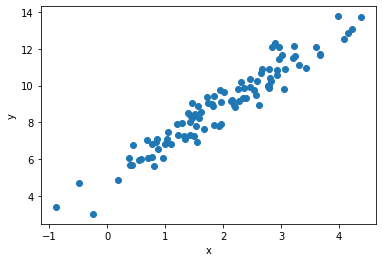

In [108]:
a = 5; b = 2                    # intercept and slope for the regression line
N = 100                         # sample size
x = np.random.normal(2, 1, N)   # x values
err = np.random.randn(N)        # error terms

y = a + b * x + 0.75 * err       # regression equation usnig vectorisation

# basic data visualisation
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [109]:
# matrix-based solution
# convert x and y in to proper matrixes for analysis, that is, two-dimensional arrays
X = np.hstack((np.ones((N,1)), x.reshape(N,1)))
Y = y.reshape(N,1)

# print top 5 rows of each matrix
print(X[0:5])
print(Y[0:5])

[[1.         2.82281064]
 [1.         3.23845318]
 [1.         3.29907045]
 [1.         1.74260687]
 [1.         2.46572793]]
[[10.2271165 ]
 [11.60241691]
 [11.14599259]
 [ 9.02735564]
 [ 9.93986023]]


In [110]:
# OLS regression solution formula using numpy functionality
np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(Y)

array([[5.01511138],
       [1.97493253]])

Two values we got as a result are very close to "true" values of the intercept and slope we used to generate the data. Hence, the method works fine.

No need to memorise this example. We would never use this approach to solve linear regression problems as there are special tools for that. For example, using `scikit-learn` -- https://scikit-learn.org/stable/index.html. You will need just one line of code for the most complex analysis.

In [111]:
# load the best package for machine leaning using Python
from sklearn.linear_model import LinearRegression

# run regression analisys
reg = LinearRegression().fit(x.reshape(-1,1), y.reshape(-1,1))

print(reg.intercept_)   # intercept
print(reg.coef_)        # slope

[5.01511138]
[[1.97493253]]


## Save and load data

There are two sides of the problem of storing and loading data which are common for many packages: 
1. Package Numpy can store data in its own binary format and then load these data. 
2. Package Numpy can store and load data in "alien" formats, e.g. txt.

The first option works through functions `np.save()` and `np.load()`. It is assumed that you have loaded the package Numpy with abbreviated name `import numpy as np`.

In [112]:
import numpy as np
arr = np.arange(10) # create a test array
np.save("my_array", arr) # save an array in a file

Now, if you check your working directory, you see a file `my_array.npy`. Extension `.npy` was added automatically and it is a default format to save data -- an uncompressed raw binary format. 

In [113]:
del arr   # delete an array for a "clean" test
          # you can check - "arr" is not available in memory
arr = np.load("my_array.npy")  # load data into a variable "arr"
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

It is possible to save multiple arrays in one zip archive using a function `np.savez()`. You provide arrays to save as keyword arguments and these keywords become names for your arrays.

In [114]:
np.savez("many_arrays.npz", a = arr, b = arr)  # we store the same array twice for the test

Again, check your working directory -- there is a new file `many_arrays.npz`.

In [115]:
my_data = np.load("many_arrays.npz") # load data into a variable "my_data"
my_data

The result of loading data is a special object from `numpy` package. However, it behaves very similar to a dictionary data type and have similar methods. Try to run `dir(my_data)`.

In [116]:
my_data.files  # property to get a list of objects inside zip-archive

['a', 'b']

In [117]:
list(my_data.keys())  # an alternative method to get names of stored arrays

['a', 'b']

In [118]:
list(my_data.values()) # get values of all stored arrays

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]

In [119]:
list(my_data.items()) # load data as a list of tuples: name and value

[('a', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 ('b', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))]

In [120]:
my_data['a'] # extract required array by its name

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The second option mentioned above was reading data from other formats. The most popular format to share data between different applications is `.csv` -- comma separated values -- text file universally supported by all applications. We can save a numpy array as a text file and we can load a text file into an array. As you should be able to guess, the functions are `np.savetxt()` and `np.loadtxt()`

In [121]:
arr = np.arange(15).reshape(3,5) # create a test array
# save an array in a text file with comma as a delimiter and format for numbers integer
np.savetxt("my_array.csv", arr, fmt = "%d", delimiter = ",") 

Check the working directory, you'll see a file `my_array.csv`. You can use Excel to open it or any text-editor.

It is important to understand that whatever you store in a text file is a text. Even if you see numbers -- they are a string. So, the numerical array was converted in to a string. Please recall different formats to output numbers as a string. We have to provide correct information about how to convert numbers in a string by using parameter `fmt`. 

Comma delimited values is the most common format for semi-structured data, however the might be other options. You are free to use any character as a delimiter.

Now, loading data from text file.

In [122]:
# load data from csv file and convert it in integer
arr = np.loadtxt("my_array.csv", dtype = int, delimiter = ",")
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

No need to memorise these functions. For practical purposes we are going to use more advanced functions for loading data from Pandas package -- it is a next week topic. However, it is very useful to get a general understanding of how data loading functions work as they work very similar in all packages and in all programming languages: provide a file name, provide a delimiter, set a format to convert loaded data. There are a lot of other parameters that you can change -- check the help file `help(np.loadtxt)`

## Random numbers generation

Final topic about numpy is a random numbers generation. This is a very useful activity for testing your ideas and your code (besides statisical, optimisation, estimation and many other purposes). Numpy supports a very efficient generation of whole  arrays of random numbers from many kinds of probability distributions -- check `dir(np.random)`.

Text(0.5, 1.0, 'Normal distribution')

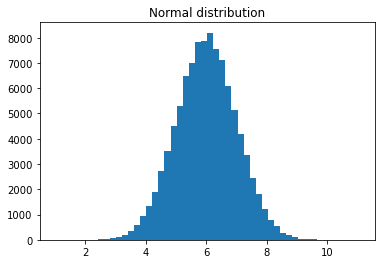

In [123]:
from matplotlib import pyplot as plt    # load package for data visualisation

# generate random numbers from normal distribution
# with mean 6 and standard deviations 1
x = np.random.normal(6, 1, size = 100000)  

# plot the histogram
plt.hist(x, bins = 50)
plt.title("Normal distribution")

In [124]:
# generate an array of random numbers from uniform distribution
# all values are between 0 and 1
x = np.random.uniform(size = (100000,12))
x[:5, :5]  # check first five rows and first 5 columns

array([[0.72971457, 0.1314171 , 0.88842487, 0.86526323, 0.07404352],
       [0.73176391, 0.14552428, 0.55043932, 0.01312726, 0.95450795],
       [0.41116569, 0.2915605 , 0.40902978, 0.77093363, 0.74285514],
       [0.71424071, 0.45524603, 0.10945024, 0.76321501, 0.14445209],
       [0.92452784, 0.59721163, 0.07211334, 0.4656709 , 0.56854008]])

Text(0.5, 1.0, 'Uniform distribution')

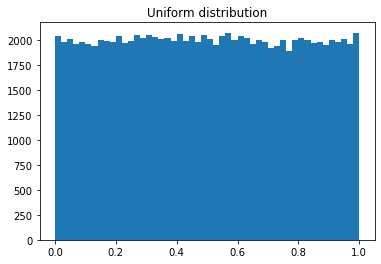

In [125]:
# plot the histogram of the first column, other columns are very similar
plt.hist(x[:,0], bins = 50)
plt.title("Uniform distribution")

In [126]:
# do summation of the array "x" for all 12 columns
y = x.sum(axis = 1)
y.shape

(100000,)

Text(0.5, 1.0, 'Summation of 12 Uniform distributions')

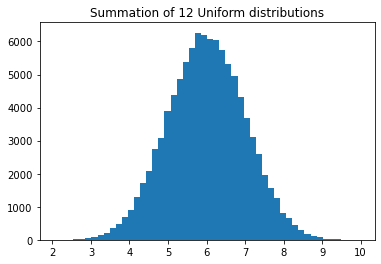

In [127]:
# plot the histogram
plt.hist(y, bins = 50)
plt.title("Summation of 12 Uniform distributions")

Compare the histogram of the summation of 12 uniform distributions to the histogram of the Normal distribution. Are they the same or different? Why? Try other distributions or try different numbers of rows and columns.